In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
fashion_mnist = keras.datasets.fashion_mnist

fashion = fashion_mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = fashion


# Step 2: Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0



In [3]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))  # Corrected this line
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))  # Added missing Conv2D layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes


In [5]:
# Step 4: Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 41s 22ms/step - loss: 0.4127 - accuracy: 0.8557


In [6]:
# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3528 - accuracy: 0.8693

Test accuracy: 0.8693000078201294


In [7]:
# Step 6: Make predictions on new data
predictions = model.predict(test_images)

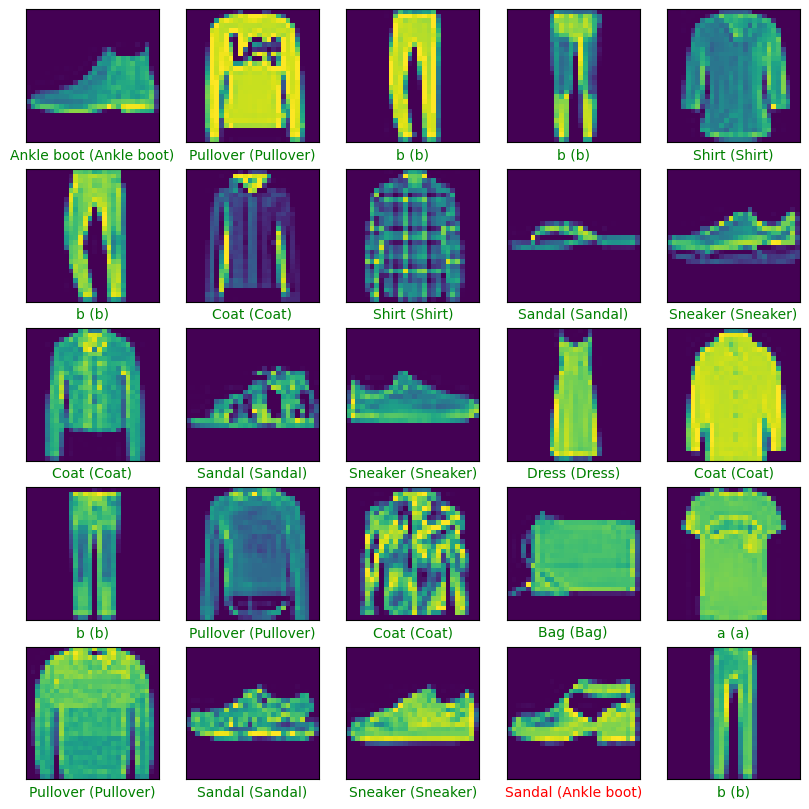

In [17]:
# Mapping numeric labels to clothing categories
# class_labels = {
#     0: 'T-shirt/top',
#     1: 'Trouser',
#     2: 'Pullover',
#     3: 'Dress',
#     4: 'Coat',
#     5: 'Sandal',
#     6: 'Shirt',
#     7: 'Sneaker',
#     8: 'Bag',
#     9: 'Ankle boot'
# }
# Mapping numeric labels to clothing categories
class_labels = {
    0: 'a',
    1: 'b',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Function to plot images with clothing labels
def plot_images_with_labels(images, labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'
        plt.xlabel(f'{class_labels[predicted_label]} ({class_labels[true_label]})', color=color)
    plt.show()

plot_images_with_labels(test_images, test_labels, predictions)



